# The Notebook to test the Models
## Uses the training images from Arpit Jadon's work
### Images are downloaded to disk.

In [1]:
#Create the notebook to test the accuracy and judgement on data never seen before.
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import ImageDataGenerator

In [2]:
Classes = ['Fire', 'NoFire']

In [3]:
#Execute this command to get test data to local disk
#!aws s3 cp s3://swifty-datasets/firenet_data/test/ /root/data/test/ --recursive

In [4]:
DATADIR = 'D:\\Data\\test'

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [6]:
batch_size = 50
IMG_SHAPE = 128

In [7]:
from keras.models import load_model

In [ ]:

#initial download to instance. After downloading to S3, no need to run this again.
_URL = 'https://swifty-ai-models.s3.amazonaws.com/firenet/final_model.zip'

#zip_file = tf.keras.utils.get_file(origin=_URL,extract=True)  
#This will ge the file and extract it to a directory and extract to /Training Dataset

In [ ]:
#print(os.path.dirname(zip_file))

In [ ]:
#export_path_sm=os.path.join(os.path.dirname(zip_file), 'final_model')
#print(export_path_sm)

In [8]:
export_path_sm = 'C:\\Users\\hp\\OneDrive\\Code\\AI Projects\\Fire_Detection\\final_model\\1'

In [9]:
reload_sm_keras = tf.keras.models.load_model(
  export_path_sm,
  custom_objects={'KerasLayer': hub.KerasLayer})

reload_sm_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 64, 64, 32)       320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

In [30]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=20,
                            directory=DATADIR,
                            target_size=(IMG_SHAPE,IMG_SHAPE),
                            class_mode='binary',
                            shuffle = False)

Found 871 images belonging to 2 classes.


In [31]:
#Print Classification Report and Confusion Matrix
#Confusion Matrix and Classification Report
Y_pred = reload_sm_keras.predict(val_data_gen, int(np.ceil(val_data_gen.n / float(batch_size))))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['Fire', 'No Fire']
print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[569  24]
 [ 10 268]]
Classification Report
              precision    recall  f1-score   support

        Fire       0.98      0.96      0.97       593
     No Fire       0.92      0.96      0.94       278

    accuracy                           0.96       871
   macro avg       0.95      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871



In [67]:
Y_pred = tf.squeeze(Y_pred).numpy()
predicted_ids = np.argmax(Y_pred, axis=1)

In [70]:
print(Y_pred[870])
print(predicted_ids[870])

[0.01420757 0.98579246]
1


In [65]:
print(round(np.max(Y_pred[870])*100,2))

98.58


In [21]:
print("Labels: ", val_data_gen.classes)
print("Predicted labels: ", predicted_ids)

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

IndexError: index 871 is out of bounds for axis 0 with size 871

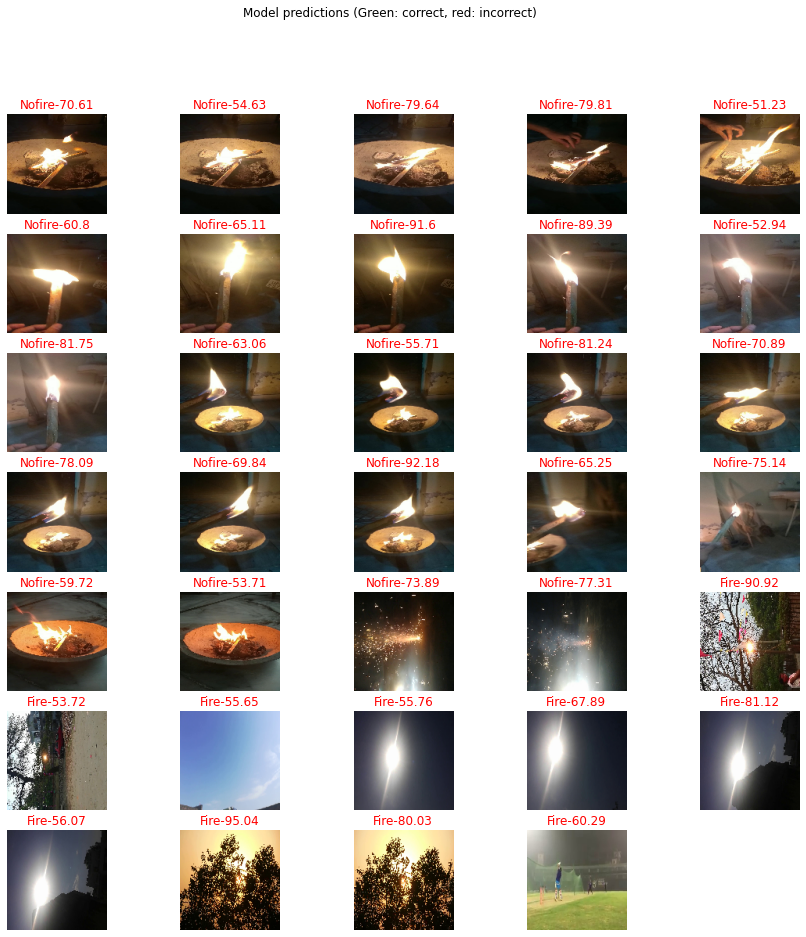

In [72]:
#Checking only the incorrect pictures
plt.figure(figsize=(15,15))
batch_num=10
 #0-44 batches.
count = 1
for batch_num in range(45):
  for n in range(20):
    img_batch = val_data_gen[batch_num][0] 
    if (predicted_ids[batch_num*20+n] != val_data_gen.classes[batch_num*20+n]):
      plt.subplot(7,5,count)
      count+=1
      probability = round(np.max(Y_pred[batch_num*20+n])*100,2)
      plt.imshow(img_batch[n])
      color = "green" if predicted_ids[batch_num*20+n] == val_data_gen.classes[batch_num*20+n] else "red"
      plt.title(Classes[predicted_ids[batch_num*20+n]].title()+"-"+ str(probability), color=color)
      plt.axis('off')
      plt.suptitle("Model predictions (Green: correct, red: incorrect)")
    

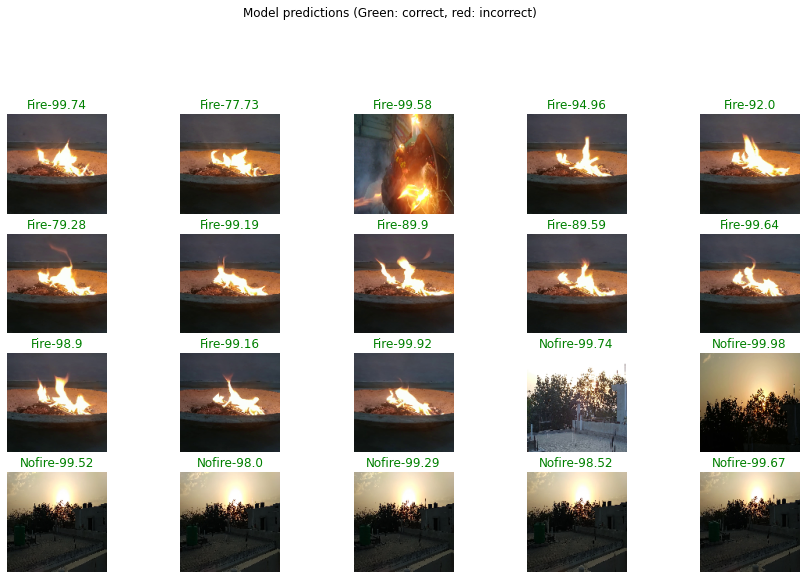

In [79]:
plt.figure(figsize=(15,15))
batch_num=29
 #0-44 batches.
count = 1
for n in range(20):
  img_batch = val_data_gen[batch_num][0] 
  plt.subplot(7,5,n+1)
  count+=1
  probability = round(np.max(Y_pred[batch_num*20+n])*100,2)
  plt.imshow(img_batch[n])
  color = "green" if predicted_ids[batch_num*20+n] == val_data_gen.classes[batch_num*20+n] else "red"
  plt.title(Classes[predicted_ids[batch_num*20+n]].title()+"-"+ str(probability), color=color)
  plt.axis('off')
  plt.suptitle("Model predictions (Green: correct, red: incorrect)")
    

### Revision Point on showing images in batches

In [ ]:
plt.figure(figsize=(10,9))
img = val_data_gen[13][0] #Batch index label index e.g. batch 13
plt.subplot(6,5,n+1)
plt.imshow(img[19]) #INdex of image in batch of 20

In [17]:
missed_values = []
for index in range(val_data_gen.n):
    if predicted_ids[index] != val_data_gen.classes[index]:
        missed_values.append(index)

In [18]:
print(missed_values)

[214, 225, 228, 231, 249, 250, 251, 255, 261, 265, 279, 280, 281, 282, 283, 284, 288, 292, 297, 346, 394, 422, 445, 723, 728, 753, 761, 762, 776, 777, 811, 812, 847]


In [19]:
print(len(missed_values))

33
